In [9]:
from google.colab import files
uploaded = files.upload()

In [0]:
import pandas as pd
from fbprophet import Prophet

In [32]:
df = pd.read_csv('past_demand.csv')
df.head()

ds   y  1  2  3  4  5  6  7  8  9  10  11
0  2016-01   0  0  0  0  0  0  0  0  0  0   0   0
1  2016-02   0  0  0  0  0  0  0  0  0  0   0   0
2  2016-03  40  2  3  2  2  3  5  5  4  5   4   5
3  2016-04  40  2  3  2  2  3  5  5  4  5   4   5
4  2016-05  35  2  2  2  2  3  4  4  3  5   4   4

In [33]:
df = df.rename(columns={'y':'sum', '1':'y'})
df.head()

ds  sum  y  2  3  4  5  6  7  8  9  10  11
0  2016-01    0  0  0  0  0  0  0  0  0  0   0   0
1  2016-02    0  0  0  0  0  0  0  0  0  0   0   0
2  2016-03   40  2  3  2  2  3  5  5  4  5   4   5
3  2016-04   40  2  3  2  2  3  5  5  4  5   4   5
4  2016-05   35  2  2  2  2  3  4  4  3  5   4   4

In [34]:
m = Prophet(weekly_seasonality=False, daily_seasonality=False)
m.fit(df)

In [0]:
future = m.make_future_dataframe(periods=12,freq='m')
forecast = m.predict(future)

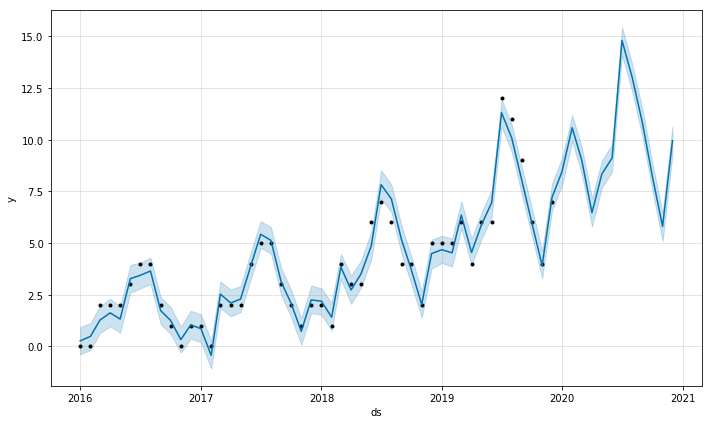

In [36]:
fig = m.plot(forecast)

In [0]:
forecast.to_csv(path_or_buf='forecast.csv', sep=',')